In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Temperature_Prediction.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
print(df.shape)
df.info()

(7752, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
for i in df.loc['Present_Tmax':'Next_Tmin']:
    if df[i].isnull().sum()>0:
        df[i]=df[i].fillna(df[i].mean())
df.isnull().sum()       

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [7]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30 00:00:00.000000000,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30 00:00:00.000000000,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30 00:00:00.000000000,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30 00:00:00.000000000,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30 00:00:00.000000000,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30 00:00:00.000000000,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30 00:00:00.000000000,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30 00:00:00.000000000,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,2015-07-19 15:52:15.483882752,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Label Encoding the Dataset.

In [8]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
df['Date']=lenc.fit_transform(df['Date'])
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,12,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,12,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,12,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,12,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,12,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,302,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,302,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,302,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,146,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [44]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df.apply(zscore)
threshold=3
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(7752, 25)
(6894, 25)


In [42]:
6894/7752*100

88.93188854489165

# Train, Test Split

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x=df1.drop(['Next_Tmax','Next_Tmin'],axis=1)
print(x.shape)
y2=df1['Next_Tmax'].to_numpy()
y1=df1['Next_Tmin'].to_numpy()
y_max=pd.DataFrame(y2)
y_min=pd.DataFrame(y1)
print(y_max.shape)
print(y_min.shape)

(6894, 23)
(6894, 1)
(6894, 1)


In [46]:
x_train,x_test,y_min_train,y_min_test=train_test_split(x,y_min,test_size=0.2,random_state=42)
x_train,x_test,y_max_train,y_max_test=train_test_split(x,y_max,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_min_train.shape)
print(y_min_test.shape)
print(y_max_train.shape)
print(y_max_test.shape)

(5515, 23)
(1379, 23)
(5515, 1)
(1379, 1)
(5515, 1)
(1379, 1)


In [11]:
y_max_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6201 entries, 4420 to 7270
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6201 non-null   float64
dtypes: float64(1)
memory usage: 96.9 KB


# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [48]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_min_train,y_min_test=train_test_split(x,y_min,test_size=0.2,random_state=42)
    x_train,x_test,y_max_train,y_max_test=train_test_split(x,y_max,test_size=0.2,random_state=42)
    lr.fit(x_train,y_min_train)
    lr.fit(x_train,y_max_train)
    pred_train_max=lr.predict(x_train)
    pred_train_min=lr.predict(x_train)
    pred_test_max=lr.predict(x_test)
    pred_test_min=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(y_max_train,pred_train_max)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_min_train,pred_train_min)}')
    print(f'At random state {i}, the testing accuarcy is :- {r2_score(y_max_test,pred_test_max)}')
    print(f'At random state {i}, the testing accuarcy is :- {r2_score(y_min_test,pred_test_min)}')
    print('\n')

At random state 0,the training accuracy is :- 0.7431836960046891
At random state 0,the training accuracy is :- -9.867074513816641
At random state 0, the testing accuarcy is :- 0.7593365683039651
At random state 0, the testing accuarcy is :- -10.660025633195174


At random state 1,the training accuracy is :- 0.7431836960046891
At random state 1,the training accuracy is :- -9.867074513816641
At random state 1, the testing accuarcy is :- 0.7593365683039651
At random state 1, the testing accuarcy is :- -10.660025633195174


At random state 2,the training accuracy is :- 0.7431836960046891
At random state 2,the training accuracy is :- -9.867074513816641
At random state 2, the testing accuarcy is :- 0.7593365683039651
At random state 2, the testing accuarcy is :- -10.660025633195174


At random state 3,the training accuracy is :- 0.7431836960046891
At random state 3,the training accuracy is :- -9.867074513816641
At random state 3, the testing accuarcy is :- 0.7593365683039651
At random state 

At random state 31,the training accuracy is :- 0.7431836960046891
At random state 31,the training accuracy is :- -9.867074513816641
At random state 31, the testing accuarcy is :- 0.7593365683039651
At random state 31, the testing accuarcy is :- -10.660025633195174


At random state 32,the training accuracy is :- 0.7431836960046891
At random state 32,the training accuracy is :- -9.867074513816641
At random state 32, the testing accuarcy is :- 0.7593365683039651
At random state 32, the testing accuarcy is :- -10.660025633195174


At random state 33,the training accuracy is :- 0.7431836960046891
At random state 33,the training accuracy is :- -9.867074513816641
At random state 33, the testing accuarcy is :- 0.7593365683039651
At random state 33, the testing accuarcy is :- -10.660025633195174


At random state 34,the training accuracy is :- 0.7431836960046891
At random state 34,the training accuracy is :- -9.867074513816641
At random state 34, the testing accuarcy is :- 0.7593365683039651
A

At random state 62, the testing accuarcy is :- -10.660025633195174


At random state 63,the training accuracy is :- 0.7431836960046891
At random state 63,the training accuracy is :- -9.867074513816641
At random state 63, the testing accuarcy is :- 0.7593365683039651
At random state 63, the testing accuarcy is :- -10.660025633195174


At random state 64,the training accuracy is :- 0.7431836960046891
At random state 64,the training accuracy is :- -9.867074513816641
At random state 64, the testing accuarcy is :- 0.7593365683039651
At random state 64, the testing accuarcy is :- -10.660025633195174


At random state 65,the training accuracy is :- 0.7431836960046891
At random state 65,the training accuracy is :- -9.867074513816641
At random state 65, the testing accuarcy is :- 0.7593365683039651
At random state 65, the testing accuarcy is :- -10.660025633195174


At random state 66,the training accuracy is :- 0.7431836960046891
At random state 66,the training accuracy is :- -9.86707451381664

At random state 93,the training accuracy is :- -9.867074513816641
At random state 93, the testing accuarcy is :- 0.7593365683039651
At random state 93, the testing accuarcy is :- -10.660025633195174


At random state 94,the training accuracy is :- 0.7431836960046891
At random state 94,the training accuracy is :- -9.867074513816641
At random state 94, the testing accuarcy is :- 0.7593365683039651
At random state 94, the testing accuarcy is :- -10.660025633195174


At random state 95,the training accuracy is :- 0.7431836960046891
At random state 95,the training accuracy is :- -9.867074513816641
At random state 95, the testing accuarcy is :- 0.7593365683039651
At random state 95, the testing accuarcy is :- -10.660025633195174


At random state 96,the training accuracy is :- 0.7431836960046891
At random state 96,the training accuracy is :- -9.867074513816641
At random state 96, the testing accuarcy is :- 0.7593365683039651
At random state 96, the testing accuarcy is :- -10.660025633195174


# Support Vector Regression

In [49]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y_min = sc_y.fit_transform(y_min)
y_max = sc_y.fit_transform(y_max)
print(x.shape)
print(y_min.shape)
print(y_max.shape)

(6894, 23)
(6894, 1)
(6894, 1)


In [50]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    print(sv.fit(x_train,y_min_train))
    print(sv.fit(x_train,y_max_train))
    print(sv.score(x_train,y_min_train))
    print(sv.score(x_train,y_max_train))

SVR(kernel='linear')
SVR(kernel='linear')
-10.705358142622817
-1.0418626388231615
SVR(kernel='poly')
SVR(kernel='poly')
-10.530904229462285
0.0467265272619406
SVR()
SVR()
-10.491420484042548
0.05355901873871538


In [51]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
svr.fit(x,y_min)
svr.fit(x,y_max)
y_min_pred = svr.predict(x)
y_max_pred = svr.predict(x)
print(y_min_pred)
print(y_max_pred)

[-0.48025752  0.10743049  0.07457409 ... -0.90946973 -0.86550919
 -0.87816983]
[-0.48025752  0.10743049  0.07457409 ... -0.90946973 -0.86550919
 -0.87816983]


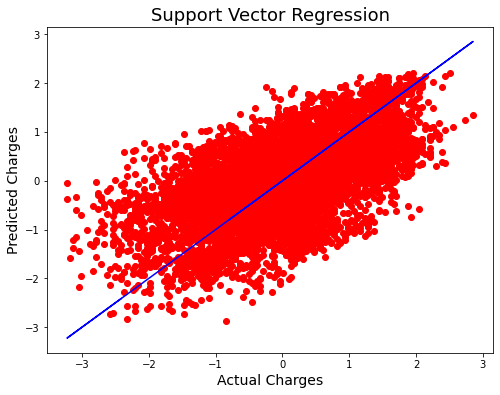

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_min,y=y_min_pred,color='r')
plt.plot(y_min,y_min,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

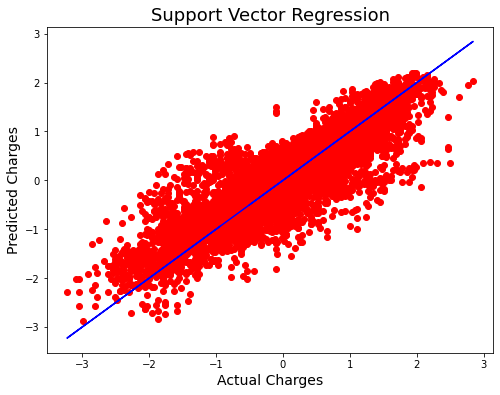

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_max,y=y_max_pred,color='r')
plt.plot(y_max,y_max,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

# Decision Tree Regression

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_min_train)
dtc.fit(x_train,y_max_train)
y_min_pred=dtc.predict(x)
y_max_pred=dtc.predict(x)
print("Predicted Minimun Temperature:",y_min_pred)
print("Predicted Maximun Temperature:",y_max_pred)

Predicted Minimun Temperature: [22.7 22.7 22.7 ... 22.7 22.7 22.7]
Predicted Maximun Temperature: [22.7 22.7 22.7 ... 22.7 22.7 22.7]


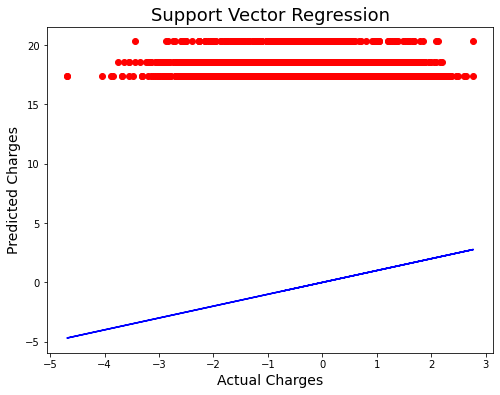

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_min,y=y_min_pred,color='r')
plt.plot(y_min,y_min,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

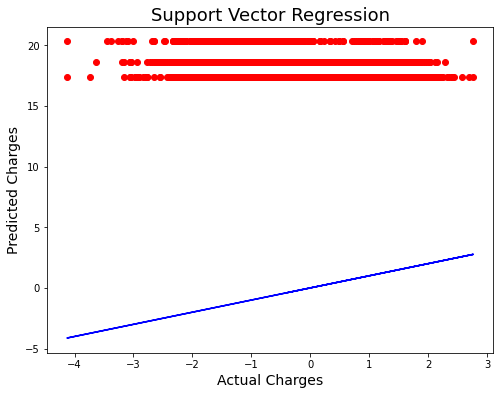

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_max,y=y_max_pred,color='r')
plt.plot(y_max,y_max,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Support Vector Regression',fontsize=18)
plt.show()

In [23]:
# Cross Validation Score

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
train_min_accuracy=r2_score(y_min_train,pred_train_min)
train_max_accuracy=r2_score(y_max_train,pred_train_max)
test_min_accuracy=r2_score(y_min_test,pred_test_min)
test_max_accuracy=r2_score(y_max_test,pred_test_max)

for j in range(2,10):
    cv_min_score=cross_val_score(lr,x,y_min,cv=j)
    cv_max_score=cross_val_score(lr,x,y_max,cv=j)
    cv_min_mean=cv_min_score.mean()
    cv_max_mean=cv_max_score.mean()
    print(f'For T_min at Cross fold {j} the cv score is {cv_min_mean}, accuracy score of training is {train_min_accuracy} and accuracy score of testing is {test_min_accuracy}')
    print(f'For T_max at Cross fold {j} the cv score is {cv_max_mean}, accuracy score of training is {train_max_accuracy} and accuracy score of testing is {test_max_accuracy}')
    print('\n')

For T_min at Cross fold 2 the cv score is 0.8048886080031517, accuracy score of training is -8.590637371757989 and accuracy score of testing is -8.310729782810176
For T_max at Cross fold 2 the cv score is 0.5906914745476068, accuracy score of training is 0.7688289805067122 and accuracy score of testing is 0.7709811084883638


For T_min at Cross fold 3 the cv score is 0.77759352734501, accuracy score of training is -8.590637371757989 and accuracy score of testing is -8.310729782810176
For T_max at Cross fold 3 the cv score is 0.6846192987068059, accuracy score of training is 0.7688289805067122 and accuracy score of testing is 0.7709811084883638


For T_min at Cross fold 4 the cv score is 0.7837240347434091, accuracy score of training is -8.590637371757989 and accuracy score of testing is -8.310729782810176
For T_max at Cross fold 4 the cv score is 0.6966029506321729, accuracy score of training is 0.7688289805067122 and accuracy score of testing is 0.7709811084883638


For T_min at Cross

# Regularisation

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf_min=GridSearchCV(ls,parameters)
clf_max=GridSearchCV(ls,parameters)
clf_min.fit(x_train,y_min_train)
clf_max.fit(x_train,y_max_train)
print(clf_min.best_params_)
print(clf_max.best_params_)

{'alpha': 0.0001, 'random_state': 0}
{'alpha': 0.0001, 'random_state': 0}


In [31]:
ls_min=Lasso(alpha=0.0001,random_state=0)
ls_max=Lasso(alpha=0.0001,random_state=0)
ls_min.fit(x_train,y_min_train)
ls_max.fit(x_train,y_max_train)
ls_min.score(x_train,y_min_train)
ls_max.score(x_train,y_max_train)
pred_min_ls=ls_min.predict(x_test)
pred_max_ls=ls_max.predict(x_test)
lss_min=r2_score(y_min_test,pred_min_ls)
lss_max=r2_score(y_max_test,pred_max_ls)
print('r2 score for T_min',lss_min)
print('r2 score for T_max',lss_max)

r2 score for T_min 0.8454913421152573
r2 score for T_max 0.7709779758812321


In [32]:
cv_min_score=cross_val_score(ls_min,x,y_min,cv=5)
cv_max_score=cross_val_score(ls_max,x,y_max,cv=5)
cv_min_mean=cv_min_score.mean()
cv_max_mean=cv_max_score.mean()
print('CV mean for T_min',cv_min_mean)
print('CV mean for T_max',cv_min_mean)

CV mean for T_min 0.7725503580552784
CV mean for T_max 0.7725503580552784


# Ensemble Technique

In [33]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf_min=GridSearchCV(rf,parameters)
clf_max=GridSearchCV(rf,parameters)
clf_min.fit(x_train,y_min_train)
clf_max.fit(x_train,y_max_train)
print('',clf_min.best_params_)
print(clf_max.best_params_)

 {'criterion': 'mse', 'max_features': 'log2'}
{'criterion': 'mse', 'max_features': 'sqrt'}


In [37]:
rf_min=RandomForestRegressor(criterion='mse',max_features='log2')
rf_max=RandomForestRegressor(criterion='mse',max_features='sqrt')
rf_min.fit(x_train,y_min_train)
rf_max.fit(x_train,y_max_train)
pred_min_decision=rf_min.predict(x_test)
pred_max_decision=rf_max.predict(x_test)
rfs_min=r2_score(y_min_test,pred_min_decision)
rfs_max=r2_score(y_max_test,pred_max_decision)
print('r2 Score of T_min',rfs_min*100)
print('r2 Score of T_max',rfs_max*100)
rfscore_min=cross_val_score(rf_min,x,y_min,cv=5)
rfscore_max=cross_val_score(rf_max,x,y_max,cv=5)
rfc_min=rfscore_min.mean()
rfc_max=rfscore_max.mean()
print('Cross Val Score of T_min:',rfc_min*100)
print('Cross Val Score of T_max:',rfc_max*100)

r2 Score og T_min 92.4192965476953
r2 Score og T_max 92.33805473143826
Cross Val Score of T_min: 76.61150555174243
Cross Val Score of T_max: 66.63698523965657


# Conclusion

Here we can see that Random Forest Regressor gives us the best Accuracy.

# Saving Model

In [ ]:
import pickle
filename_min= 'picklerf_minfile.pkl'
filename_min= 'picklerf_maxfile.pkl'
pickle.dump(rf_min, open(filename, 'wb'))
pickle.dump(rf_max, open(filename, 'wb'))
# Load the model from disk
loaded_model_min=pickle.load(open('picklerf_minfile.pkl','rb'))
loaded_model_max=pickle.load(open('picklerf_maxfile.pkl','rb'))
